# PHYS20762 - Project - Numerical Integration of Differential Equations: 
#                                       The Damped Harmonic Oscillator
Alejandro Macías Pastor <br>
April 2022

Initialising the Python interpreter:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

## Numerical resolution

Numerical methods allow for the resolution of system whose analytical solution is not known. In this case, however, they will be applied to a spring-mass system forming a damped harmonic oscillator, whose analytical solution is perfectly known, when unforced or forced by forces of a particular form. The equation of motion for the system in the unforced case is:
$$ ma(t)+bv(t)+kx(t)=0$$
where $m$ is the mass attached to the spring, $b$ is the damping constant and $k$ is the spring constant, and where $v(t)=x'(t)$ and $a(t)=v'(t)=x''(t)$, forming a homogenous second-order linear differential equation. To solve it completely, two possibilities for the values of the damping coefficient $b$ need to be studied. When $b \neq 2\sqrt{km}$, the analytical solution is of the form
$$ x(t) = e^{-\gamma t/2}(Ae^{i \omega t} + Be^{-i \omega t})$$
whereas when $b=2\sqrt{km}$, the analytical solution takes the form
$$ x(t) = Ae^{-\gamma t/2} + Bte^{-\gamma t/2}$$
where $\gamma = b/m$, $\omega^2 = \omega_0^2 - \gamma^2/4$ and $\omega_0 = \sqrt{k/m}$. The value $b_{cr} = 2\sqrt{km}$ is known as critical damping coefficient. <br>
This type of systems will be studied over a period of time from $t=0$ to $t=T$, having initial conditions $x(t=0)=x_0$ and $v(t=0)=v_0$.

In [3]:
# Specifying the physical parameters of the system
m = 3.51 # kg
k = 3.1 # kg/s^2 
# critical damping coefficient
b_cr = 2*math.sqrt(k*m) # kg/s
b = 0.08 # kg/s


# initial conditions
x_0 = 0 # m
v_0 = -1 # m/s

# desired integration time and time step size, both in s
T = 221
h = 0.01

# number of steps
n = int(T/h)

The four different methods that will be used to solve the differential equation are: Euler's method, the improved Euler's method, Euler-Cromer method and Verlet's method. <br>
Euler's method consists of computing:
$$x_{i+1} = x_{i} + h \cdot v_{i}$$ 
$$v_{i+1} = v_{i} + h \cdot a_{i}$$  
with
$$a_{i} = -(k/m) x_{i} -(b/m) v_{i}$$
where $h$ is a small interval in time. <br>
The improved Euler's method is just a higher-order variation of this, where the only difference is found in:
$$x_{i+1} = x_{i} + h \cdot v_{i} + (h^2/2) a_i$$ 
Euler-Cromer method is yet another variation, with the only difference being:
$$x_{i+1} = x_{i} + h \cdot v_{i+1}$$ 
On the other hand, Verlet's method consists of setting:
$$a_{i} = -(k/m) x_{i} -(b/m) v_{i}$$
$$ v_i = (x_{i+1}-x_{i-1})/2h $$
$$ x_{i+1} = 2x_i - x_{i-1} + h^2a_i $$
In all of these expressions, the index $i$ represents the number of time steps of value $h$ taken, meaning that a period of time equal to $t=ih$ has elapsed

In [4]:
def EulerMethod(x_0, v_0, n, h):
    # Empty arrays to store the positions, velocities and energies
    x = np.zeros(n)
    v = np.zeros(n)
    E = np.zeros(n)
    
    # Storing initial conditions
    x[0] = x_0
    v[0] = v_0
    E[0] = 0.5 * (k*x[0]**2 + m*v[0]**2)
    
    for i in range(n-1):
        
        # Calculating the acceleration for every step in m/s^2
        a = -(k/m)*x[i] - (b/m)*v[i]
        # Calculating position (in m) and velocity (in m/s) for every step
        x[i+1] = x[i] + h*v[i]
        v[i+1] = v[i] + a*h
        E[i+1] = E[i]*(1+(k/m*h**2)) 
    
    return (x, v, E)

def ImprovedEuler(x_0, v_0, n, h):
    # repeating the same process as for basic Euler's method
    x = np.zeros(n)
    v = np.zeros(n)
    E = np.zeros(n)
    
    x[0] = x_0
    v[0] = v_0
    E[0] = 0.5 * (k*x[0]**2 + m*v[0]**2)
    
    for i in range(n-1):

        a = -(k/m)*x[i] - (b/m)*v[i]
        # calculating the position accordingly with the higher-order-approximation
        x[i+1] = x[i] + h*v[i] + (h**2/2)*a
        v[i+1] = v[i] + a*h
        E[i+1] = 0.5 * (k*x[i+1]**2 + m*v[i+1]**2)
    
    return (x, v, E)

def VerletMethod(x_0, v_0, n, h):
    # creating empty array to store positions
    x = np.zeros(n)

    x[0] = x_0
    # this method is not self-starting and so needs to obtain the first position through other method to be able to start
    x[1] = ImprovedEuler(x_0, v_0, 2, h)[0][1]
    
    # Constants
    D = 2*m + b*h
    A = 2*(2*m - k*h**2)/D
    B = (b*h - 2*m)/D
    
    # since the first two position are already stored, the method starts on i=2
    for i in range(n-1)[1:]:
        # calculating the positions
        x[i+1] = A*x[i] + B*x[i-1]

    return x

def EulerCromer(x_0, v_0, n, h):
    # Creating emtpy arrays to store the information
    x = np.zeros(n)
    v = np.zeros(n)
    E = np.zeros(n)
    
    # setting initial conditions
    x[0] = x_0
    v[0] = v_0
    E[0] = 0.5 * (k*x[0]**2 + m*v[0]**2)
    
    for i in range(n-1):
        a = -(k/m)*x[i] - (b/m)*v[i]
        v[i+1] = v[i] + a*h
        # paying attention to the different computation of the positions with this method
        x[i+1] = x[i] + h*v[i+1]
        E[i+1] = E[i] - 0.5 * h**2 * (k**2 * x[i]**2/m - k*v[i]**2) - h**3 * k**2 * x[i]*v[i]/m + h**4 * k**3 *\
                 x[i]**2/(2*m**2)
    
    return (x, v, E)

def Analytic(x_0, v_0, time):
    # Constants
    A = (b/(2*1j*cmath.sqrt(4*k*m-b**2))+1/2)*x_0+v_0*m/(cmath.sqrt(4*k*m-b**2)*1j) 
    B = x_0-A
    
    x = np.exp(-b*time/(2*m))*(A*np.exp(1j*cmath.sqrt(4*k*m-b**2)*time/(2*m))
                              +B*np.exp(-1j*cmath.sqrt(4*k*m-b**2)*time/(2*m)))

    # only the real part of the solution has physical meaning
    return x.real

def CritAnalytic(x_0, v_0, time):
    # Constants
    A = x_0
    B = b*x_0/(2*m)+v_0
    
    # different expression for critical damping b^2 = 4km
    x = A*np.exp(-b*time/(2*m)) + B*time*np.exp(-b*time/(2*m))
    
    # the position only takes real values in the case of critical damping
    return x

Plotting the four different computed solutions along with the analytical solution to compare:

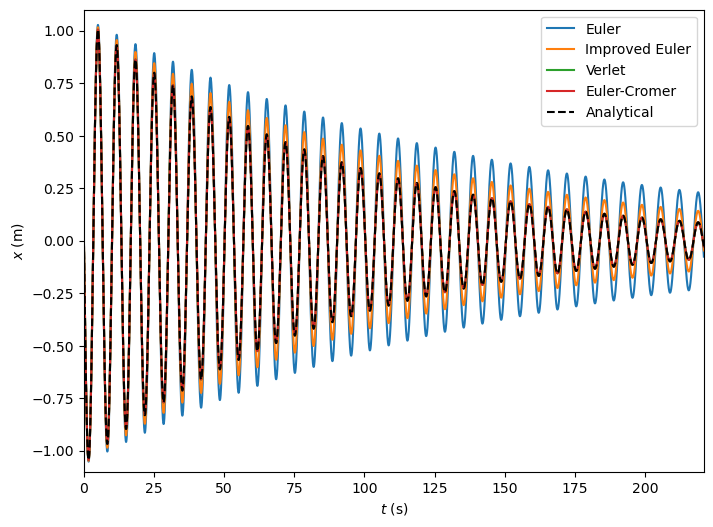

In [5]:
time = np.arange(0, T, h)

plt.rcParams["figure.figsize"] = (8,6)
plt.figure()

# plotting the positions obtained with methods on the same axis
plt.plot(time, EulerMethod(x_0, v_0, n, h)[0], label='Euler')

plt.plot(time, ImprovedEuler(x_0, v_0, n, h)[0], label='Improved Euler')

plt.plot(time, VerletMethod(x_0, v_0, n, h), label='Verlet')

plt.plot(time, EulerCromer(x_0, v_0, n, h)[0], label='Euler-Cromer')

# plotting the analytical solution over the same axis
# taking into account that there are two differnt expressions depending on the value of the damping coeficcient b
if b == b_cr:
    plt.plot(time, CritAnalytic(x_0, v_0, time), 'k--', label='Analytical')
else:
    plt.plot(time, Analytic(x_0, v_0, time), 'k--', label='Analytical')
    
# plotting legend
plt.legend()
# labeling plot
plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')

# setting the range of display
plt.xlim(0, T)
plt.ylim(-1.1, 1.1)

plt.show()


The plot shows considerable differences among the different numerical methods when compared to the known analytical solution. First thing to note is how well both the Euler-Cromer and Verlet's method adjust to the analytical solution, being in fact indiscernible at the scale of the plot. Another takeaway is that both Euler's and the improved Euler's methods match the qualitative evolution of the system but are not as effective as the other methods at computing the exact position, with the basic Euler's method being the less accurate of the two. This discrepancy with the analytical solution relatively grows as the system evolves, as can be seen when comparing the first few oscillations with the last ones.

## Relation between accuracy and time step size, $h$

One way to compare the accuracy of some of the different numerical methods used, as well as how it is related to the step size $h$, is to calculate the energy of the system and compare it with the known analytical solution. For this, the easiest option is study the undamped oscillator, in which $b=0$. The energy for this case should be conserved and constant during the whole evolution of the system. 

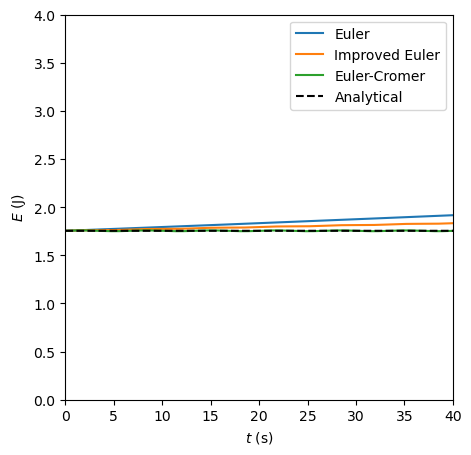

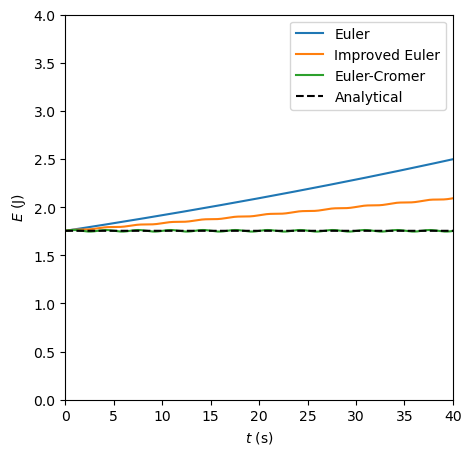

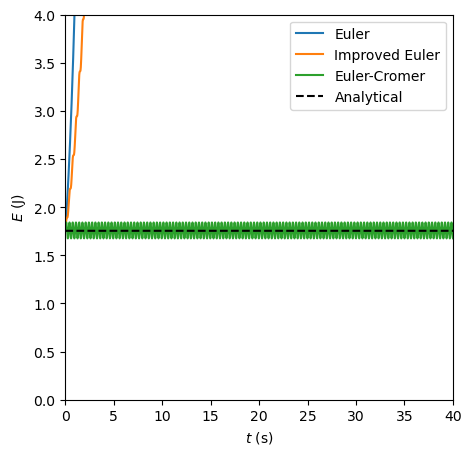

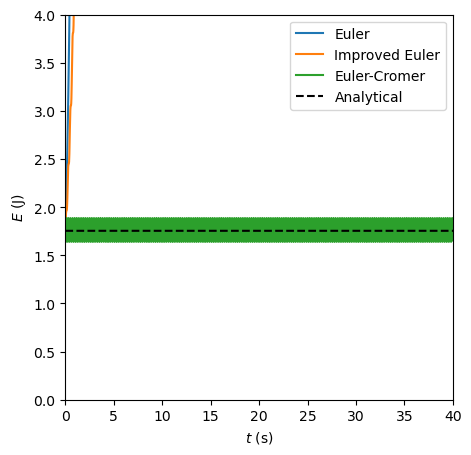

In [6]:
# setting b=0 for the undamped harmonic oscillator
b = 0
# choosing a range of time step sizes (in s)
list_h = (0.005, 0.01, 0.10, 0.15)
# calculating analytical energy of the undamped oscillator
E = 0.5 * (k*x_0**2 + m*v_0**2) * np.ones(n)

plt.rcParams["figure.figsize"] = (5,5)
plt.figure()

# plotting the energy computed with three differnt methods for each time step size
for h in list_h:
    plt.plot(time, EulerMethod(x_0, v_0, n, h)[2], label='Euler')

    plt.plot(time, ImprovedEuler(x_0, v_0, n, h)[2], label='Improved Euler')

    plt.plot(time, EulerCromer(x_0, v_0, n, h)[2], label='Euler-Cromer')

    # plotting the analytical energy along with them
    plt.plot(time, E, 'k--', label='Analytical')
    
    # plotting legend
    plt.legend()
    # labeling plot
    plt.xlabel('$t$ (s)')
    plt.ylabel('$E$ (J)')
    
    # setting plot limits
    plt.xlim(0, 40)
    plt.ylim(0, 4)

    plt.show()

    


As can be observed from the energy plots, the best method as far as the conservation of energy is concerned is the Euler-Cromer method, as expected since it's a method designed to be a symplectic integrator. Although the method does not compute a constant energy throughout the evolution of the system, it does predict one that oscilates about the known real energy of the system, averaging out to the constant energy of the undamped simple harmonic oscillator. As far as the other methods are concerned, they both compute situations that are far from being the real simple harmonic oscillator with constant mechanical energy. In both cases the energy steadily increases, at a slower rate in the case of the improved Euler's method, straying further and further away from the real value as the system evolves.<br>
In all cases, the computed energy is more accurate the smaller the size of the time step $h$. For both the basic and improved Euler's methods this is shown in a much slower rate of increase of the computed energy, whereas for the Euler-Cromer method this translates into a smaller amplitude of the oscillations about the actual energy of the system. <br>
It can safely be stated that the best method among these is the Euler-Cromer method, from both the approach of the accuracy of the oscillations shown in the previous section and the conservation of energy.

# Underdamping, critical damping and overdamping

The value of the damping coefficient $b$ represents the strength of the linear damping force that opposes the motion of the system. Depending on its value, the system shows different behaviours, which can be observed on the different solutions to the differential equation presented in previous sections. 
The Euler-Cromer method will now be studied for different values of the damping coefficient $b$, by comparing the computed solution with the analytical solution of the damped harmonic oscillator. All three possibilities of the damped harmonic oscillator (underdamping, overdamping and critical damping) will be covered:

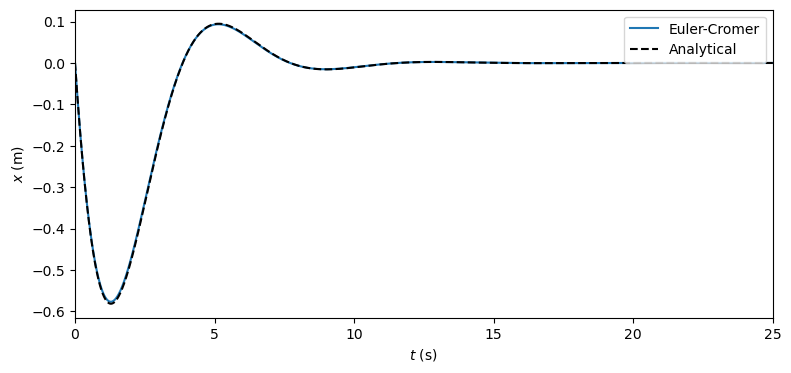

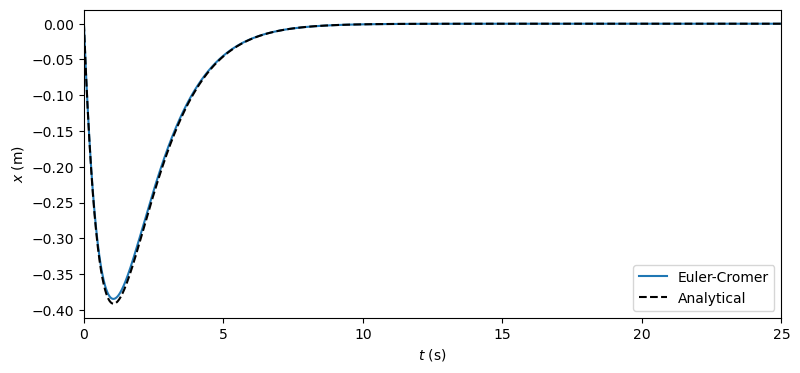

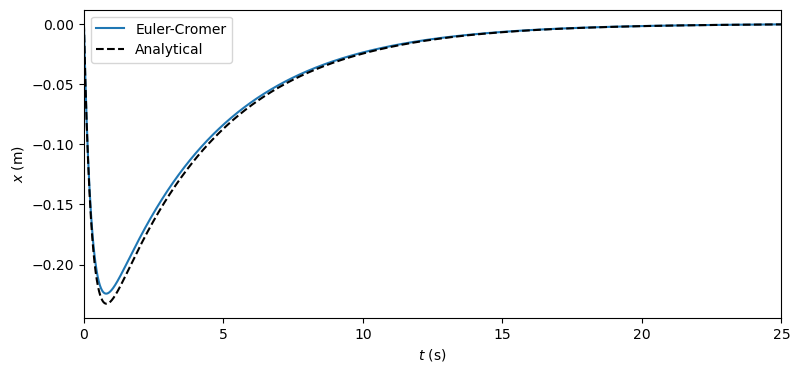

In [7]:
# choosing a list of values for the damping term
list_b= (0.5*b_cr, b_cr, 2*b_cr)
# fixing a time step size
h = 0.01

plt.rcParams["figure.figsize"] = (9,4)
plt.figure()

for b in list_b:
    # plotting the positions for the different damping coefficients
    plt.plot(time, EulerCromer(x_0, v_0, n, h)[0], label='Euler-Cromer')
    
    # plotting the analyitical solution over the same axis
    if b == b_cr:
        plt.plot(time, CritAnalytic(x_0, v_0, time), 'k--', label='Analytical')
    else:
        plt.plot(time, Analytic(x_0, v_0, time), 'k--', label='Analytical')
        
    
    # labeling the plot
    plt.xlabel('$t$ (s)')
    plt.ylabel('$x$ (m)')
    
    plt.legend()
    
    # setting plot limits
    plt.xlim(0, 25)   
    plt.show()


When $b<b_{cr}$, the system is underdamped and it simply oscillates with steadily decreasing amplitude when displaced from its equilibrium position, which can be predicted from the mathematical expression by realising that, if $b<b_{cr}$, then $\omega$ is a real number and the complex exponential lead to oscillations.<br>
When $b=b_{cr}$ the phenomenon of critical damping takes places and the system rapidly tends to recover its equilibrium position without even oscillating. <br>
Finally, when $b>b_{cr}$, the system is overdamped and, just like in the case of critical damping, it approaches the equilibrium position without oscillating first. The mathematical expression predicts this since in this case $\omega$ is a purely imaginary number and so the behaviour is mathematically ruled by two decaying real exponentials. One interesting feature to note is that in the case of critical damping the system recovers its equilibrium position at a faster rate than in the case of overdamping, despite the damping coefficient, and so the damping force related to it, being stronger. <br>
As far as the numerical method is concerned, it can be observed that it matches the analytical solution quite accurately. Nonetheless, it should be noticed that the Euler-Cromer method seems to become less accurate as the value of the damping coefficent $b$ increases, giving the best result for the case of underdamping.

## Damped driven harmonic oscillator

When  a force comes into action, the equation of motion for the damped harmonic oscillator is:
$$ ma(t)+bv(t)+kx(t)=F(t)/m$$
This inhomogenous differential equation does not have an analytical solution for all types of forces, making numerical methods very useful to study different cases of the forced damped harmonic oscillator.

In [7]:
def EulerCromerForced(x_0, v_0, n, h, force):
    # redefining  Euler-Cromer method taking into account the effect of the force
    x = np.zeros(n)
    v = np.zeros(n)
    E = np.zeros(n)
    
    x[0] = x_0
    v[0] = v_0
    E[0] = 0.5 * (k*x[0]**2 + m*v[0]**2)
    
    for i in range(n-1):
        # the force only directly affects the computation of the acceleration
        a = -(k/m)*x[i] - (b/m)*v[i] + (1/m)*force[i]
        v[i+1] = v[i] + a*h
        x[i+1] = x[i] + h*v[i+1]
    
    return x

The first case that will be studied is that of a 'push' being applied to the harmonic oscillator, that is, a sudden and instantaneous force. Several 'pushes' will be studied, concerning different application times and signs of the force.

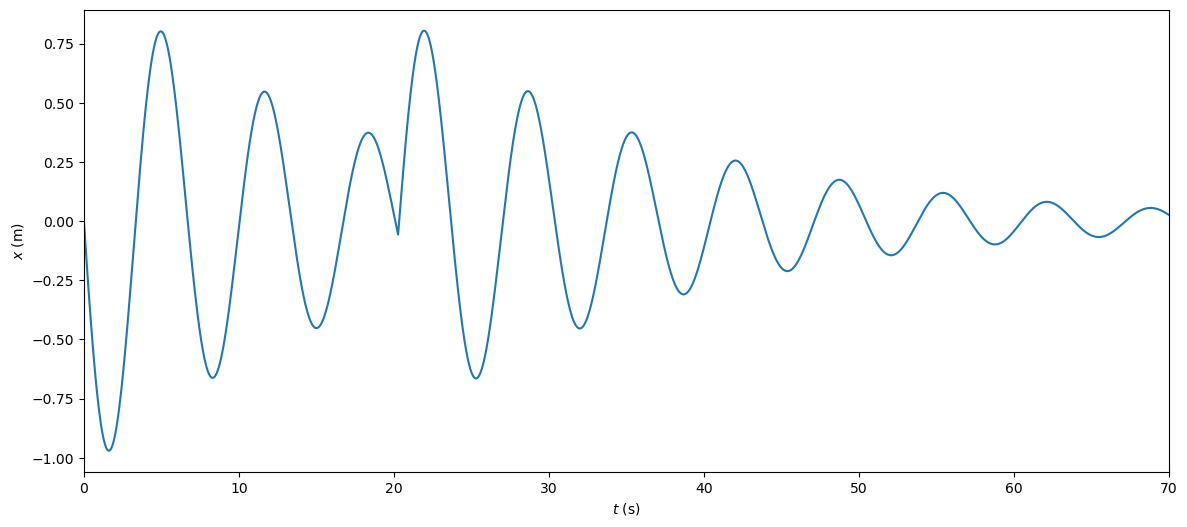

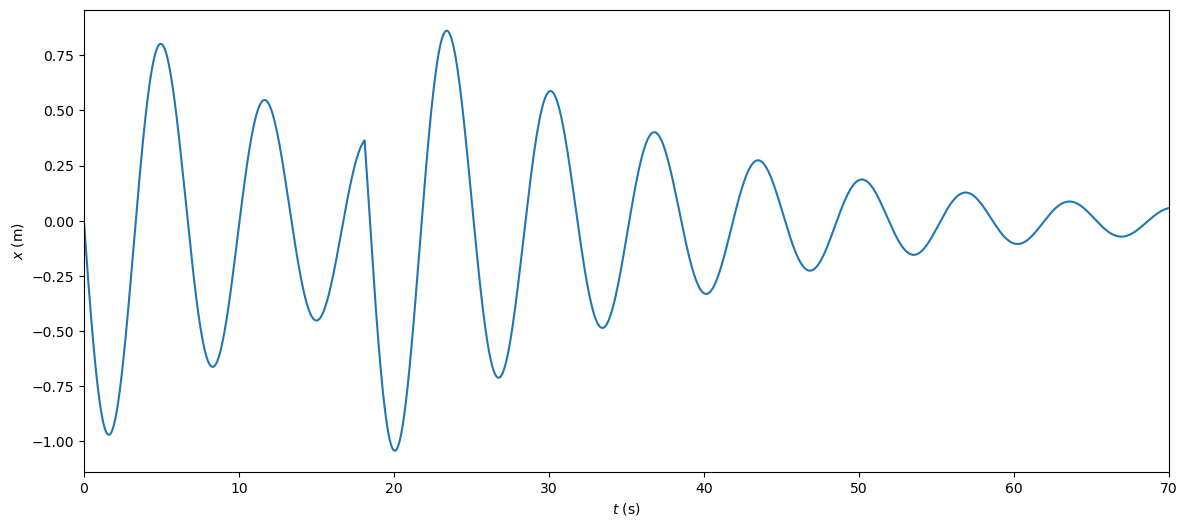

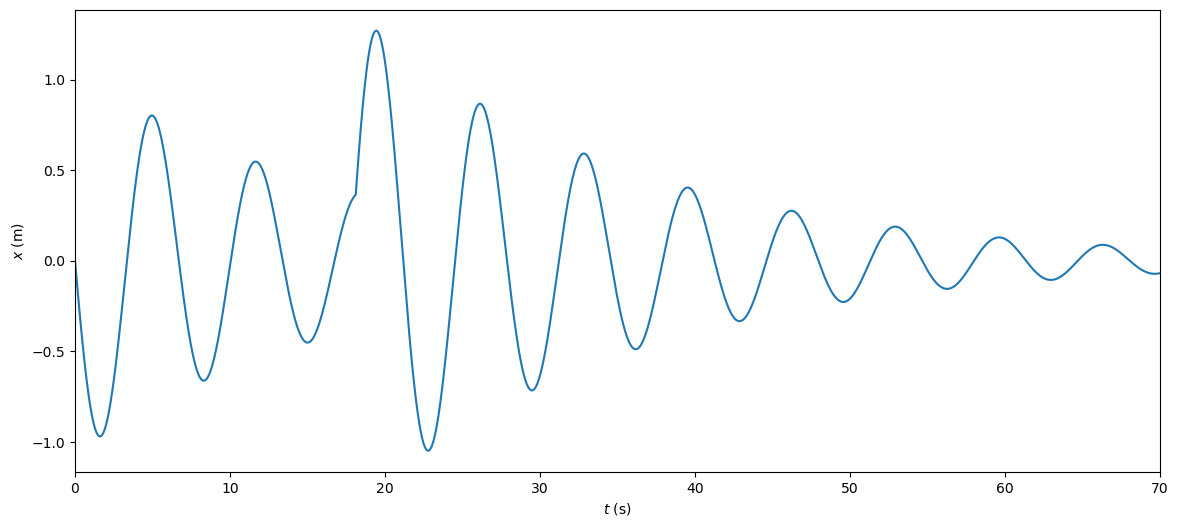

In [26]:
# resetting the value of the damping coefficient
b = 0.4

# defining three different sudden pushes with different intensities and timing
push_1 = np.append(np.append(np.zeros(int(n/10.9)), 400*np.ones(1)), np.zeros(n-1-int(n/10.9)))
push_2 = np.append(np.append(np.zeros(int(n/12.2)), -400*np.ones(1)), np.zeros(n-1-int(n/12.2)))
push_3 = np.append(np.append(np.zeros(int(n/12.2)), 400*np.ones(1)), np.zeros(n-1-int(n/12.2)))

# 
list_push = [push_1, push_2, push_3]

plt.rcParams["figure.figsize"] = (14,6)
plt.figure()


for push in list_push:
    # plotting the positions for each different push
    plt.plot(time, EulerCromerForced(x_0, v_0, n, h, push))
    
    # labeling plot
    plt.xlabel('$t$ (s)')
    plt.ylabel('$x$ (m)')
    
    # setting plot limits
    plt.xlim(0, 70)   
    plt.show()

In the first plot, a 'push' that opposes the motion of the system is applied after a few oscillations when the velocity approaches its local maximum value. After the force is applied, the system bounces back and recovers a very similar state to that of previous oscillations, continuing to decay after. <br>
The second plot shows a system in which the force has been applied approximately at a moment of instantaneous rest, in which the velocity is close to zero. The force pushes the system into an oscillation with an amplitude bigger than the ones that had come before. <br>
For the third plot, the force was applied at exactly the same spot in time as the one before, now being opposite in sign. The behaviour of the system is very similar to the one earlier, pushing the system into an amplitude higher than those reached by the system before. It is interesting to note that this amplitude is quite similar in absolute value to the reached in the third plot, despite the force being applied in opposite directions. <br>
In general, the conclusion is that the behaviour of the system after being subjected to an instantaneous force is that of a damped harmonic oscillator being resetted with different initial conditions.

The other case that will be studied is that of the sinusoidally forced damped harmonic oscillator. This system is ruled by the following equation of motion:
$$ ma(t)+bv(t)+kx(t)=F_0 \cos (\omega t)/m$$

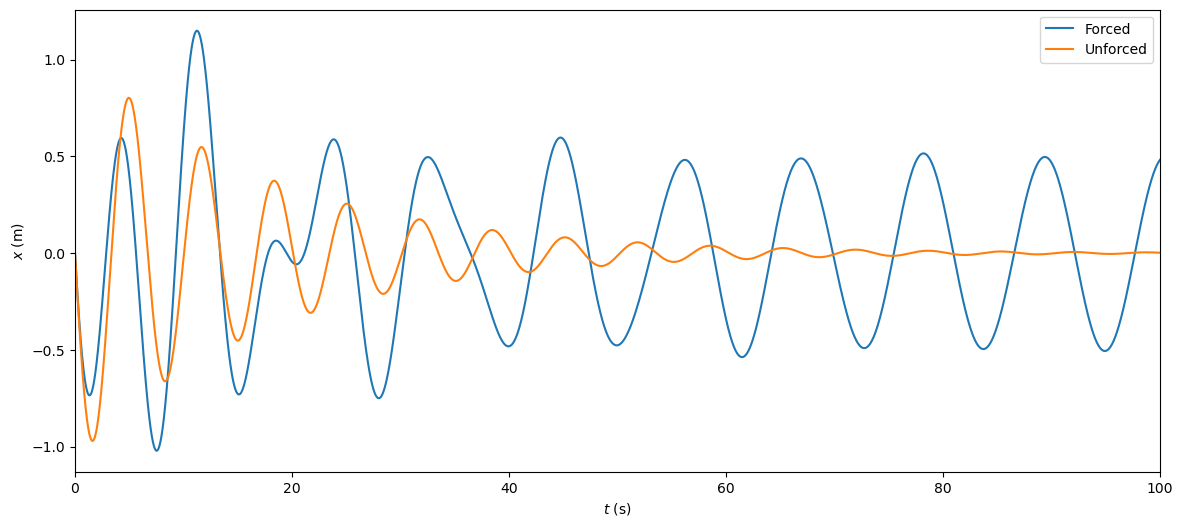

In [23]:
# setting an appropiate value for the damping coefficient
b = 0.4

# defining the sinusoidal force
force_sin = np.cos(0.6*math.sqrt(k/m)*time)

# plotting the unforced oscillations along with the sinusoidally forced oscillations
plt.plot(time, EulerCromerForced(x_0, v_0, n, h, force_sin), label='Forced')
plt.plot(time, Analytic(x_0, v_0, time), label='Unforced')

# labeling the plot
plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')

plt.legend()
# setting plot limits
plt.xlim(0, 100)
plt.show()

The behaviour for this type of force is completely different to those studied earlier. In this case, the system never returns to its equilibrium position. Instead, it starts with a series of almost erratic oscillations, known as the transient period, only to settle on simple undamped harmonic oscillations after, known as the steady state. This steady state oscillates with the frequency of the sinusoidal force. <br>
When comparing with the unforced case, the differences are clear: the unforced damped oscillator approaches its equilibrium position with oscillations of less erratic amplitude, still steadily decaying.

## Resonance

It was mentioned earlier that the frequency of the steady state after the transient period depends only on the frequency of the sinusoidal force that drives it. The amplitude of this state, however, depends on both the natural frequency of the system $\omega_0$ and the frequency of the force.

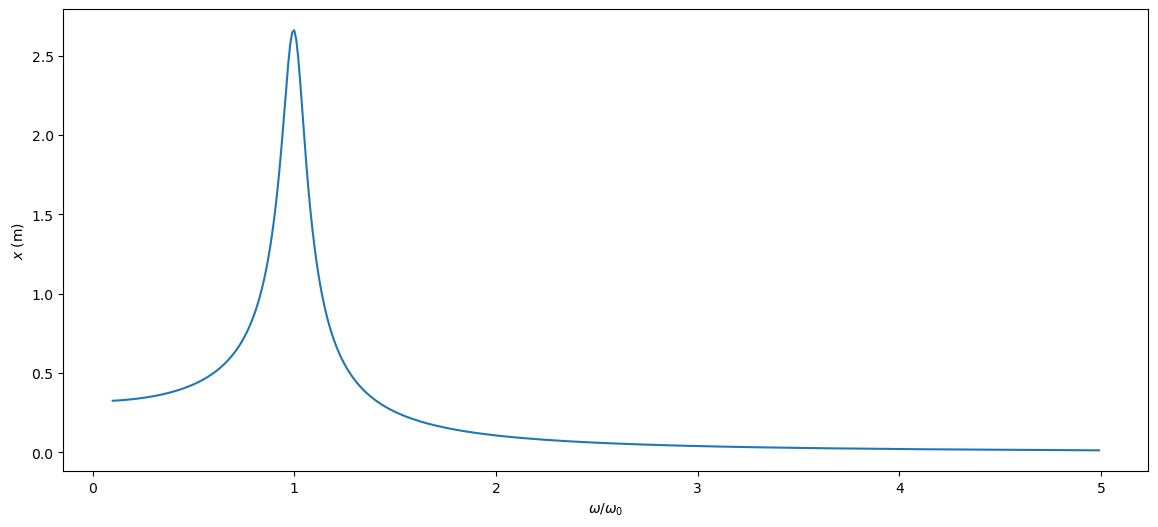

In [32]:
b = 0.4
# setting the range of frequencies
w_range = math.sqrt(k/m)*np.arange(0.1, 5, 0.01)
# creating empty array to store the ampltides
list_amp = np.zeros(len(w_range))

for i in range(len(w_range)):
    # the array is sliced to make sure that only the steady state is taken into account
    x = EulerCromerForced(x_0, v_0, n, h, np.cos(w_range[i]*time))[int(3*n/4):]
    # finding the amplitude
    list_amp[i] = np.amax(x)


# ploting the amplitude against the frequency
plt.plot(np.arange(0.1, 5, 0.01), list_amp)
# labeling the plot
# to ease the interpretation, the frequency is represented in units of w_0
plt.xlabel('$\omega/\omega_0$')
plt.ylabel('$x$ (m)')

plt.show()
    

The plot shows how the amplitude of the sinusoidally driven harmonic oscillator varies with the frequency of the force that is applied. <br>
The main feature that catches the eye is the peak that occurs at $\omega = \omega_0$. This is the phenomenon known as resonance, that takes place when the frequency of the force matches the natural frequency of the system, thus aligning the proper movement of the system with the movement caused by the forced and reaching a maximum amplitude. <br>
A second interesting trait about this plot is the fact that plot is not symmetric, which is due to the presence of the damping force opposing the movement. When the frequency of the force is high compared to the natural frequency of the system, the force 'pushes the system too often' not allowing it to fully oscillate before changing the direction of its movement time after time, and so big amplitudes cannot be reached.